# New section

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as datetime
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
import sklearn

In [3]:

df = pd.read_csv('final_df.csv')

# data

In [4]:


# Filter numeric columns (excluding the specified column)
numeric_columns = df.select_dtypes(include='number').columns

# Apply absolute function to the selected numeric columns
data_abs = df.copy()
data_abs[numeric_columns] = data_abs[numeric_columns].abs()

In [5]:
data_abs.head()

,Unnamed: 0,DATETIME,ND,TSD,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,EMBEDDED_SOLAR_CAPACITY,PUMP_STORAGE_PUMPING,...,OTHER,SOLAR,STORAGE,GENERATION,RENEWABLE,FOSSIL,Market Index Price (£/MWh),Market Index Volume (MWh),System Sell Price(GBP/MWh),Energy Imbalance (MWh)
0,0,2017-04-01 00:00:00,23874,24937,21784,1159,4831,0,11750,526,...,2070.0,0.0,0.0,26093.0,4024.0,9515.0,24.27,126.05,22.00950,572.883
1,1,2017-04-01 00:30:00,23137,24507,21095,1114,4831,0,11750,870,...,2069.0,0.0,0.0,26469.0,3891.0,9908.0,25.11,309.60,22.15351,559.190
2,2,2017-04-01 01:00:00,23168,24751,21188,1070,4831,0,11750,1040,...,2085.0,0.0,0.0,26675.0,3817.0,9976.0,29.81,461.15,28.75000,141.802
3,3,2017-04-01 01:30:00,23548,25148,21607,1027,4831,0,11750,1100,...,2088.0,0.0,0.0,26421.0,3667.0,9792.0,30.30,422.00,50.50000,40.125
4,4,2017-04-01 02:00:00,23209,25404,21309,966,4831,0,11750,1695,...,2090.0,0.0,0.0,26106.0,3587.0,9579.0,30.44,528.65,50.98269,139.325


In [6]:
df_2 = [ 'DATETIME','TSD','EMBEDDED_WIND_GENERATION', 'EMBEDDED_WIND_CAPACITY',
       'EMBEDDED_SOLAR_GENERATION', 'EMBEDDED_SOLAR_CAPACITY',
       'PUMP_STORAGE_PUMPING', 'GAS', 'COAL', 'NUCLEAR', 'WIND',
       'HYDRO', 'IMPORTS','BIOMASS', 'OTHER',
       'Market Index Price (£/MWh)', 'Market Index Volume (MWh)',
       'System Sell Price(GBP/MWh)', 'Energy Imbalance (MWh)']

In [7]:
 df_3 = ['DATETIME','TSD','EMBEDDED_WIND_GENERATION', 'EMBEDDED_WIND_CAPACITY',
       'EMBEDDED_SOLAR_GENERATION', 'EMBEDDED_SOLAR_CAPACITY',
       'PUMP_STORAGE_PUMPING', 'GAS', 'COAL', 'NUCLEAR',
       'HYDRO', 'IMPORTS','BIOMASS', 'OTHER',
       'Market Index Price (£/MWh)', 'Market Index Volume (MWh)',
       'System Sell Price(GBP/MWh)', 'Energy Imbalance (MWh)']

In [ ]:
#df2 = df1.drop(columns = {'ENGLAND_WALES_DEMAND','GENERATION','ND','RENEWABLE','EMBEDDED_SOLAR_GENERATION'})

In [8]:
df2 = data_abs[df_2]

In [9]:
df2.columns

Index(['DATETIME', 'TSD', 'EMBEDDED_WIND_GENERATION', 'EMBEDDED_WIND_CAPACITY',
       'EMBEDDED_SOLAR_GENERATION', 'EMBEDDED_SOLAR_CAPACITY',
       'PUMP_STORAGE_PUMPING', 'GAS', 'COAL', 'NUCLEAR', 'WIND', 'HYDRO',
       'IMPORTS', 'BIOMASS', 'OTHER', 'Market Index Price (£/MWh)',
       'Market Index Volume (MWh)', 'System Sell Price(GBP/MWh)',
       'Energy Imbalance (MWh)'],
      dtype='object')

In [10]:
df3 = data_abs[df_3]

'TSD', 'EMBEDDED_WIND_GENERATION', 'EMBEDDED_WIND_CAPACITY',
       'EMBEDDED_SOLAR_CAPACITY', 'PUMP_STORAGE_PUMPING', 'GAS', 'COAL',
       'NUCLEAR', 'WIND', 'HYDRO', 'IMPORTS', 'BIOMASS', 'OTHER', 'SOLAR',
       'STORAGE', 'FOSSIL', 'Market Index Price (£/MWh)',
       'Market Index Volume (MWh)', 'System Sell Price(GBP/MWh)',
       'Energy Imbalance (MWh)'

In [11]:
df2 = df2.fillna(0)


In [12]:
df3 = df3.fillna(0)

In [13]:
df3_1 = df3.set_index('DATETIME')

# Correlation

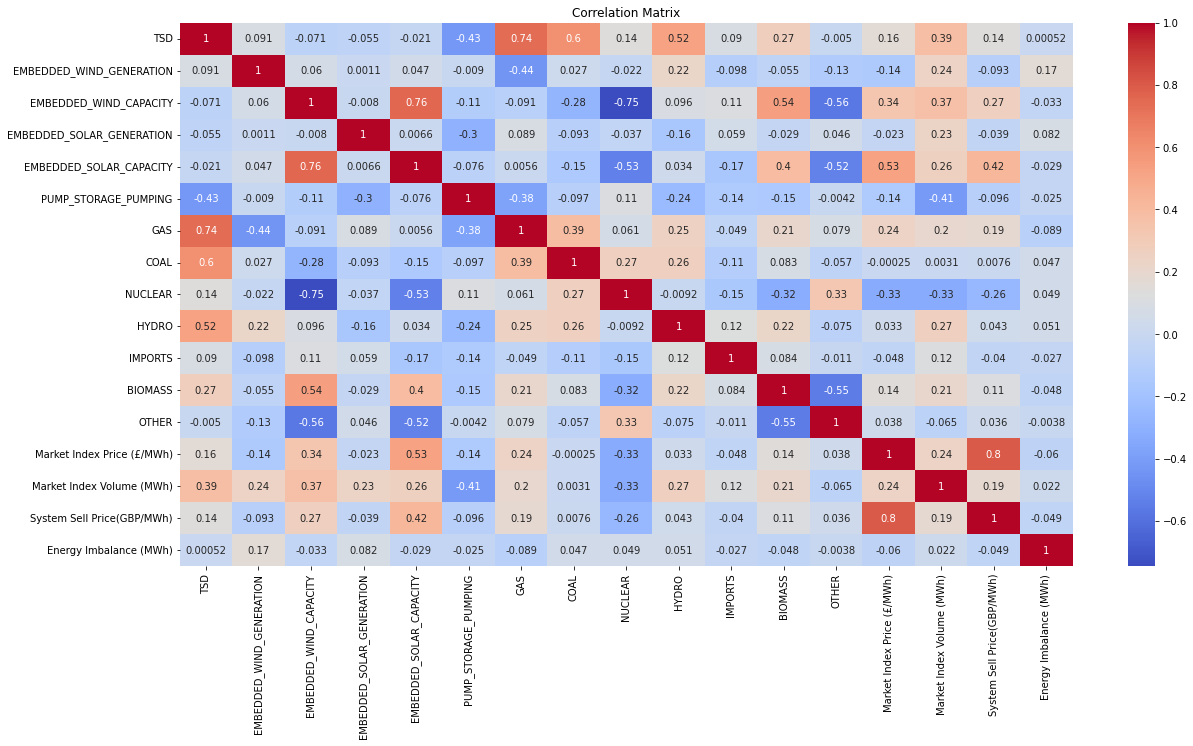

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(df3_1.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [15]:
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame
# Calculate the correlation matrix
correlation_matrix = df3_1.corr()
# Extract the absolute correlation values from the correlation matrix
abs_corr_values = correlation_matrix.abs().values



In [16]:
flat_abs = abs_corr_values.flatten()
flat_abs_sort = np.sort(abs_corr_values)

In [17]:
pq1 = pd.DataFrame({'Index': range(len(flat_abs)), 'Values': np.sort(flat_abs)})
#pd.DataFrame({'Index': range(len(corrval_1)), 'Values': corrval_1})

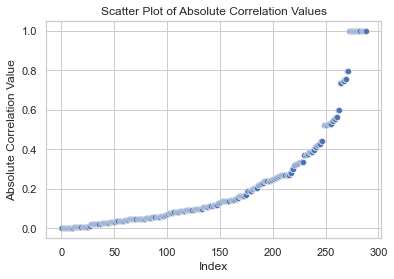

In [18]:

# Extract the 'Index' and 'Values' columns from the DataFrame
indices = pq1['Index']
valuesCorr = pq1['Values']

# Create a list of tuples containing the (index, value) pairs
lpq1 = list(zip(range(len(flat_abs)), np.sort(flat_abs)))

# Remove the first value (index 0) from the list
#lpq1 = lpq1[1:]

# Convert the list of tuples to a DataFrame
lpq1_df = pd.DataFrame(lpq1, columns=['Index', 'Values'])

# Set seaborn style
sns.set(style='whitegrid')

# Create the scatter plot
sns.scatterplot(data=lpq1_df, x='Index', y='Values')

# Set plot title and axis labels
plt.title('Scatter Plot of Absolute Correlation Values')
plt.xlabel('Index')
plt.ylabel('Absolute Correlation Value')

# Display the plot
plt.show()



In [21]:
df2;

In [22]:
correlation_matrix = df2.corr()

In [23]:
# Set the correlation threshold above which columns will be considered highly correlated
correlation_threshold = 0.8

# Find the highly correlated columns
highly_correlated_cols = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            col_i = correlation_matrix.columns[i]
            col_j = correlation_matrix.columns[j]
            if col_i != col_j:
                if col_i in df2.columns and col_j in df2.columns:
                    # Add the column with higher correlation with the target variable
                    # You can change the selection criterion as per your requirement
                    target_column = 'Market Index Price (£/MWh)'
                    corr_i = abs(df2[target_column].corr(df2[col_i]))
                    corr_j = abs(df2[target_column].corr(df2[col_j]))

                    if corr_i > corr_j:
                        highly_correlated_cols.add(col_j)
                    else:
                        highly_correlated_cols.add(col_i)

# Remove the highly correlated columns from the DataFrame
#df_filtered = df.drop(columns=highly_correlated_cols)

# Now 'df_filtered' contains the original DataFrame with highly correlated columns removed
highly_correlated_cols

{'WIND'}

# New section

In [24]:
df.columns

Index(['Unnamed: 0', 'DATETIME', 'ND', 'TSD', 'ENGLAND_WALES_DEMAND',
       'EMBEDDED_WIND_GENERATION', 'EMBEDDED_WIND_CAPACITY',
       'EMBEDDED_SOLAR_GENERATION', 'EMBEDDED_SOLAR_CAPACITY',
       'PUMP_STORAGE_PUMPING', 'GAS', 'COAL', 'NUCLEAR', 'WIND', 'HYDRO',
       'IMPORTS', 'BIOMASS', 'OTHER', 'SOLAR', 'STORAGE', 'GENERATION',
       'RENEWABLE', 'FOSSIL', 'Market Index Price (£/MWh)',
       'Market Index Volume (MWh)', 'System Sell Price(GBP/MWh)',
       'Energy Imbalance (MWh)'],
      dtype='object')

In [25]:
data_set = ['DATETIME',  'TSD',
       'EMBEDDED_WIND_GENERATION',
       'EMBEDDED_SOLAR_GENERATION', 'HYDRO',
        'BIOMASS',  'FOSSIL', 'Market Index Price (£/MWh)',
       'Market Index Volume (MWh)', 'System Sell Price(GBP/MWh)',
       'Energy Imbalance (MWh)']

In [26]:
df1= df[data_set]

In [27]:
df1 = df1.rename(columns={
    'DATETIME': 'ds',
    'Market Index Price (£/MWh)': 'y',
    'TSD': 'regressor1',
    'EMBEDDED_WIND_GENERATION': 'regressor2',
    'EMBEDDED_SOLAR_GENERATION': 'regressor3',
    'HYDRO': 'regressor4',
    'BIOMASS': 'regressor5',
    'FOSSIL': 'regressor6',
    'Energy Imbalance (MWh)': 'regressor7',
    'Market Index Volume (MWh)': 'regressor8',
    'System Sell Price(GBP/MWh)': 'regressor9'
})



import pytz

# Set timezone for datetime columns
df1['ds'] = df1['ds'].dt.tz_localize('UTC')  # Adjust timezone as needed
forecast['ds'] = forecast['ds'].dt.tz_localize('UTC')  # Adjust timezone as needed


05:33:17 - cmdstanpy - INFO - Chain [1] start processing
05:34:08 - cmdstanpy - INFO - Chain [1] done processing


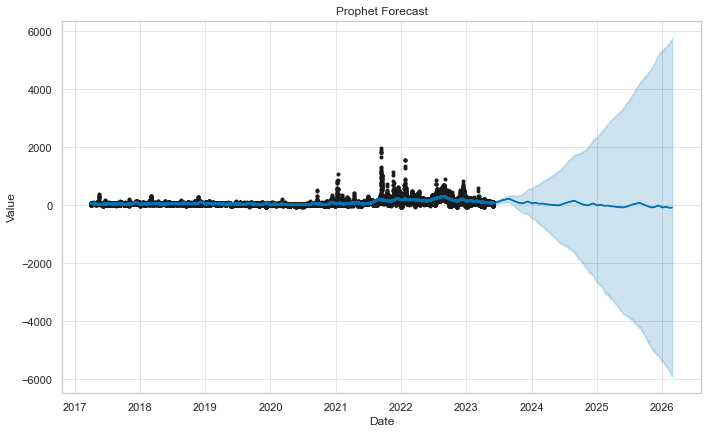

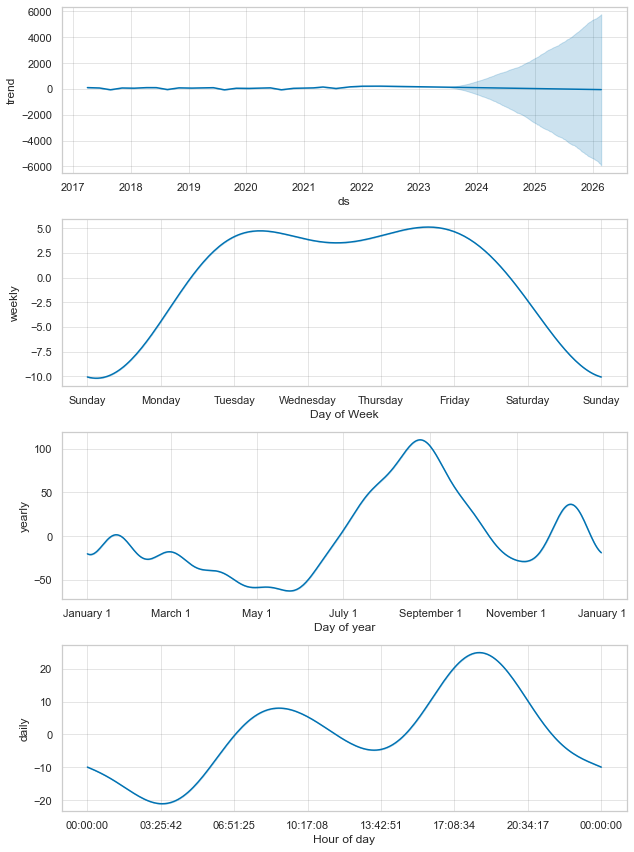

In [28]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load historical data into a DataFrame named 'historical_data'
# 'ds' column contains timestamps, and 'y' column contains the target variable


# Initialize the model
model = Prophet()

# Fit the model to historical data
model.fit(df1)

# Create a future DataFrame with timestamps for forecasting
future_dates = model.make_future_dataframe(periods=1000)  # Adjust the periods as needed

# Make forecasts
forecast = model.predict(future_dates)

# Plot the forecast
fig = model.plot(forecast)
plt.title("Prophet Forecast")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()

# Plot components
fig_comp = model.plot_components(forecast)
plt.show()

# Overlay actual data on forecast plot


In [29]:


# Calculate and print evaluation metrics (MAE, RMSE, MAPE)
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(df1['y'], forecast['yhat'][:len(df1)])
rmse = mean_squared_error(df1['y'], forecast['yhat'][:len(df1)], squared=False)
mape = (abs(df1['y'] - forecast['yhat'][:len(df1)]) / df1['y']).mean() * 100
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")




ValueError: Found input variables with inconsistent numbers of samples: [108070, 106347]

In [30]:
df1['ds'] = pd.to_datetime(df1['ds'])

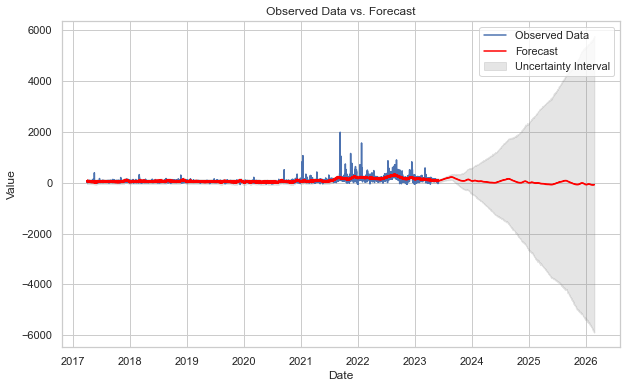

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(df1['ds'], df1['y'], label='Observed Data')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='red')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2, label='Uncertainty Interval')
plt.title("Observed Data vs. Forecast")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

In [32]:
# Calculate and print evaluation metrics (MAE, RMSE, MAPE)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(df1['y'][:100000], forecast['yhat'][:100000])
rmse = mean_squared_error(df1['y'][:100000], forecast['yhat'][:100000], squared=False)
mape = (abs(df1['y'][:100000] - forecast['yhat'][:100000]) / df1['y'][:100000]).mean() * 100
r2 = r2_score(df1['y'][:100000], forecast['yhat'][:100000])

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f'r2: {r2:.2f}')

MAE: 33.78
RMSE: 61.26
MAPE: inf%
r2: 0.46


In [33]:
mean_squared_error(df1['y'][:100000], forecast['yhat'][:100000])

3753.101160157004

In [34]:
r2 = r2_score(df1['y'][:100000], forecast['yhat'][:100000])
r2

0.45924152014642683

In [35]:
mape = (abs(df1['y'][:100000] - forecast['yhat'][:100000]) / df1['y'][:100000]).mean() * 100

In [37]:
residuals = df1['y'] - forecast['yhat'][:len(df1)]

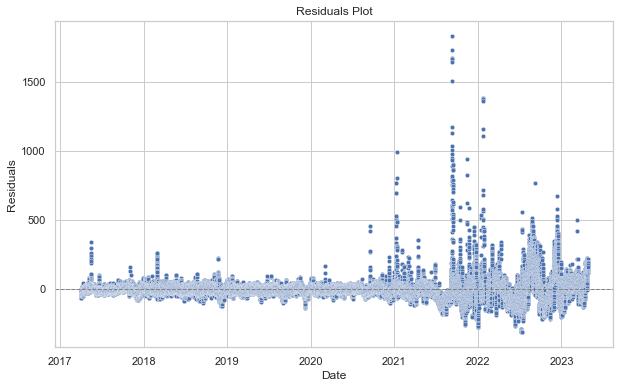

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df1['ds'], y=residuals, s=20)  # Use s to control dot size
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
plt.title("Residuals Plot")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.show()

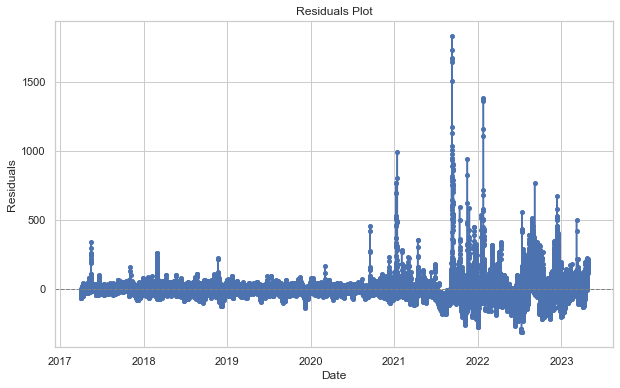

In [39]:
# Plot residuals
residuals = df1['y'] - forecast['yhat'][:len(df1)]
plt.figure(figsize=(10, 6))
plt.plot(df1['ds'], residuals, marker='o',markersize = 4 )
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
plt.title("Residuals Plot")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.show()

05:38:08 - cmdstanpy - INFO - Chain [1] start processing
05:38:59 - cmdstanpy - INFO - Chain [1] done processing


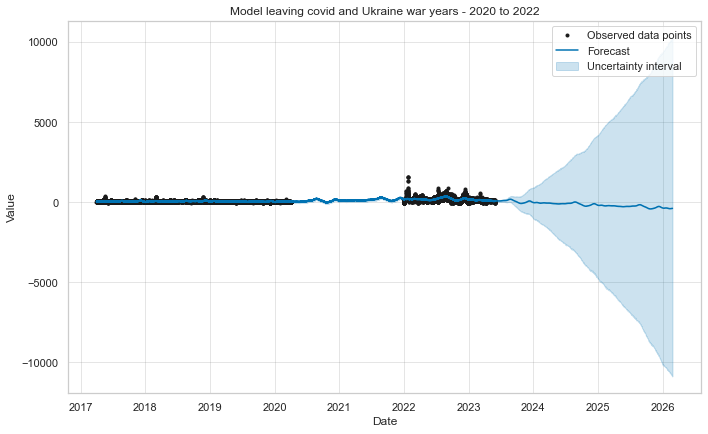

In [41]:
df1.loc[(df1['ds'] > '2020-04-01') & (df1['ds'] < '2022-01-01'), 'y'] = None
model = Prophet().fit(df1)
fig = model.plot(model.predict(future_dates))
plt.title("Model leaving covid and Ukraine war years - 2020 to 2022")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

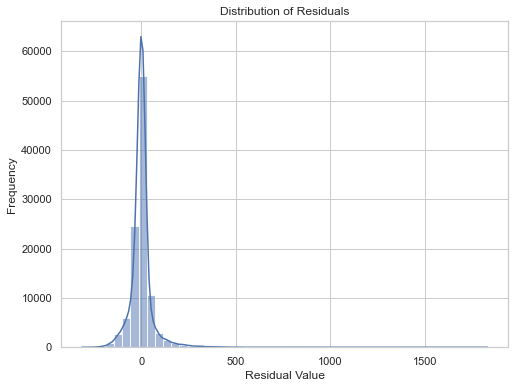

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'residuals' is a pandas Series containing the residuals from your Prophet model
# You can replace 'residuals' with your actual data
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.histplot(data=residuals, bins=50, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residual Value")
plt.ylabel("Frequency")
plt.show()



In [43]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load historical data into a DataFrame named 'historical_data'
# 'ds' column contains timestamps, and 'y' column contains the target variable
df2 = df1.copy()

# Remove timezone from the 'ds' column
df2['ds'] = df2['ds'].dt.tz_localize(None)



05:41:34 - cmdstanpy - INFO - Chain [1] start processing
05:42:27 - cmdstanpy - INFO - Chain [1] done processing


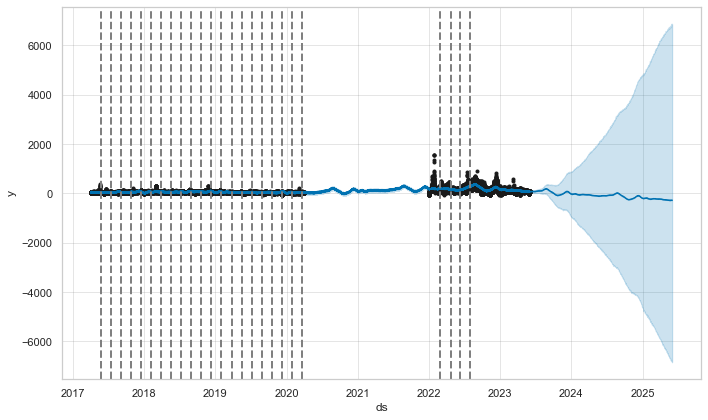

In [44]:
m = Prophet()
m.fit(df2)
future = m.make_future_dataframe(periods=732)
forecast = m.predict(future)
fig = m.plot(forecast)
for cp in m.changepoints:
    plt.axvline(cp, c='gray', ls='--', lw=2)

# PCA

## Gradient Boost

In [ ]:
# with different test splits

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data (replace 'your_data.csv' with the path to your dataset in CSV format)
data = df3

# Convert the 'DATETIME' column to a datetime object (if it's not already)
data['DATETIME'] = pd.to_datetime(data['DATETIME'])

# Sort the data by the time column ('DATETIME')
data = data.sort_values(by='DATETIME')

# Define the split point (replace with the year that separates training and testing data)
split_year = pd.to_datetime('2022-01-01')

# Split the data into training and testing sets
train_data = data[data['DATETIME'] < split_year]
test_data = data[data['DATETIME'] >= split_year]

# Separate the predictor variables (features) and the dependent variable (target)
X_train = train_data.drop(columns=['DATETIME','Market Index Price (£/MWh)'])
y_train = train_data['Market Index Price (£/MWh)']

X_test = test_data.drop(columns=['DATETIME','Market Index Price (£/MWh)'])
y_test = test_data['Market Index Price (£/MWh)']

# Now you can use X_train, y_train, X_test, and y_test for training and evaluating your models


In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tqdm import tqdm


# Split the data into training and testing sets with a test_size of 0.2 and a random state of 42
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Regression model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model on the training data with TQDM progress bar
for _ in tqdm(range(model.n_estimators), desc="Training"):
    model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Square Error: {rmse}')
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Training: 100%|███████████████████████████████| 100/100 [36:06<00:00, 21.67s/it]

Root Mean Square Error: 66.89851402718796
Mean Squared Error: 4475.411179045864
Mean Absolute Error: 47.6474782447845
R-squared: 0.5569142904131708


In [ ]:
#below code is wrong

In [ ]:
#with PCA data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tqdm import tqdm


X = data_pca.drop('Market Index Price (£/MWh)', axis=1)  # Drop the target column from the data
y = data_pca['Market Index Price (£/MWh)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create a Gradient Boosting Regression model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model on the training data with TQDM progress bar
for _ in tqdm(range(model.n_estimators), desc="Training"):
    model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Square Error: {rmse}')
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Training: 100%|██████████| 100/100 [48:47<00:00, 29.28s/it]

Root Mean Square Error: 39.85864190758093
Mean Squared Error: 1588.7113347167667
Mean Absolute Error: 23.21985424043514
R-squared: 0.762698855146176


In [ ]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Square Error: {rmse}')
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

## XGboost

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tqdm import tqdm

# Assuming 'data_pca' contains the preprocessed dataset after PCA
X = data_pca.drop('Market Index Price (£/MWh)', axis=1)  # Drop the target column
y = data_pca['Market Index Price (£/MWh)']

# Drop the datetime column if it doesn't provide meaningful information
X = X.drop('DATETIME', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Rest of the code remains unchanged...


In [ ]:

import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from tqdm import tqdm

# Assuming X_train, X_test, y_train, y_test are already defined

# Define Hyperparameter Search Space
param_dist = {
    'learning_rate': [  0.1],
    'max_depth': [3, 5, ],
    'min_child_weight': [1, 5],
    'gamma': [0, 0.1],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [0, 0.1],
    'n_estimators': [100, 200]
}

# Perform Random Search
model = xgb.XGBRegressor(random_state=42)
random_search = RandomizedSearchCV(
    model, param_distributions=param_dist, n_iter=10, n_jobs=-1, cv=5, random_state=42
)

# Run Random Search with TQDM
for _ in tqdm(range(random_search.n_iter), desc="Random Search"):
    random_search.fit(X_train, y_train)

# Print Best Parameters and Evaluate Model
print("Best Hyperparameters:", random_search.best_params_)

# Evaluate the model on the test set
y_pred = random_search.best_estimator_.predict(X_test)
# Perform any necessary evaluation metrics on y_pred and y_test


Random Search: 100%|██████████| 10/10 [1:13:48<00:00, 442.84s/it]

Best Hyperparameters: {'subsample': 0.9, 'reg_lambda': 0.1, 'reg_alpha': 0.1, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.8}


In [ ]:
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'subsample': 0.9, 'reg_lambda': 0.1, 'reg_alpha': 0.1, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.8}


In [ ]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Square Error: {rmse}')
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Root Mean Square Error: 78.9389565607597
Mean Squared Error: 6231.358862901508
Mean Absolute Error: 57.860048367241305
R-squared: 0.37896668448781035


In [ ]:
#below code are wrong due to train test split taken wrong 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tqdm import tqdm
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

data = df3_1
X = data.drop('Market Index Price (£/MWh)', axis=1)  # Drop the target column from the data
y = data['Market Index Price (£/MWh)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Hyperparameter Search Space
param_dist = {
    'learning_rate': [ 0.01,0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 5, 10],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 1.0],
    'n_estimators': [100, 200, 300]
}

# Perform Random Search
model = xgb.XGBRegressor(random_state=42)
random_search = RandomizedSearchCV(
    model, param_distributions=param_dist, n_iter=10, n_jobs=-1, cv=5, random_state=42
)

# Run Random Search with TQDM
for _ in tqdm(range(random_search.n_iter), desc="Random Search"):
    random_search.fit(X_train, y_train)

# Print Best Parameters and Evaluate Model
print("Best Hyperparameters:", random_search.best_params_)

# Evaluate the model on the test set
y_pred = random_search.best_estimator_.predict(X_test)
# Perform any necessary evaluation metrics on y_pred and y_test

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Square Error: {rmse}')
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Random Search: 100%|██████████| 10/10 [2:16:47<00:00, 820.76s/it]

Best Hyperparameters: {'subsample': 0.9, 'reg_lambda': 0, 'reg_alpha': 0, 'n_estimators': 200, 'min_child_weight': 10, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.8}
Root Mean Square Error: 22.937654897709912
Mean Squared Error: 526.1360122064355
Mean Absolute Error: 11.517114845567793
R-squared: 0.9214126095048782


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tqdm import tqdm

# Assuming 'data_pca' contains the preprocessed dataset after PCA
X = data_pca.drop('Market Index Price (£/MWh)', axis=1)  # Drop the target column
y = data_pca['Market Index Price (£/MWh)']

# Drop the datetime column if it doesn't provide meaningful information
X = X.drop('DATETIME', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Rest of the code remains unchanged...


In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tqdm import tqdm

# Assuming 'data_pca' contains the preprocessed dataset after PCA
X = data_pca.drop('Market Index Price (£/MWh)', axis=1)  # Drop the target column
y = data_pca['Market Index Price (£/MWh)']

# Drop the datetime column if it doesn't provide meaningful information
X = X.drop('DATETIME', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Hyperparameter Search Space
param_dist = {
    'learning_rate': [ 0.01,0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 5, 10],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 1.0],
    'n_estimators': [100, 200, 300]
}

# Perform Random Search
model = xgb.XGBRegressor(random_state=42)
random_search = RandomizedSearchCV(
    model, param_distributions=param_dist, n_iter=10, n_jobs=-1, cv=5, random_state=42
)

# Run Random Search with TQDM
for _ in tqdm(range(random_search.n_iter), desc="Random Search"):
    random_search.fit(X_train, y_train)

# Print Best Parameters and Evaluate Model
print("Best Hyperparameters:", random_search.best_params_)

# Evaluate the model on the test set
y_pred = random_search.best_estimator_.predict(X_test)
# Perform any necessary evaluation metrics on y_pred and y_test

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Square Error: {rmse}')
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Random Search: 100%|██████████| 10/10 [1:49:34<00:00, 657.40s/it]

Best Hyperparameters: {'subsample': 1.0, 'reg_lambda': 0.1, 'reg_alpha': 0, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 1.0}
Root Mean Square Error: 35.31763106904579
Mean Squared Error: 1247.3350643292283
Mean Absolute Error: 19.55102354807413
R-squared: 0.8136892257809607


In [ ]:
df3_1

,TSD,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,EMBEDDED_SOLAR_CAPACITY,PUMP_STORAGE_PUMPING,GAS,COAL,NUCLEAR,HYDRO,IMPORTS,BIOMASS,OTHER,Market Index Price (£/MWh),Market Index Volume (MWh),System Sell Price(GBP/MWh),Energy Imbalance (MWh)
DATETIME,,,,,,,,,,,,,,,,,
2017-04-01 00:00:00,24937,1159,4831,0,11750,526,8940.0,575.0,7560.0,478.0,2924.0,0.0,2070.0,24.27,126.05,22.00950,572.883
2017-04-01 00:30:00,24507,1114,4831,0,11750,870,9269.0,639.0,7559.0,480.0,3042.0,0.0,2069.0,25.11,309.60,22.15351,559.190
2017-04-01 01:00:00,24751,1070,4831,0,11750,1040,9297.0,679.0,7557.0,480.0,3240.0,0.0,2085.0,29.81,461.15,28.75000,141.802
2017-04-01 01:30:00,25148,1027,4831,0,11750,1100,9148.0,644.0,7556.0,480.0,3318.0,0.0,2088.0,30.30,422.00,50.50000,40.125
2017-04-01 02:00:00,25404,966,4831,0,11750,1695,8998.0,581.0,7558.0,476.0,3292.0,0.0,2090.0,30.44,528.65,50.98269,139.325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-31 21:30:00,27226,1353,6538,0,13081,6,8551.0,0.0,5271.0,98.0,3806.0,759.0,144.0,86.16,1442.90,31.00000,44.620
2023-05-31 22:00:00,26248,1348,6538,0,13081,6,7712.0,0.0,5278.0,92.0,3778.0,758.0,115.0,89.27,1382.15,30.55000,181.377
2023-05-31 22:30:00,25226,1342,6538,0,13081,5,7757.0,0.0,5277.0,92.0,2936.0,759.0,116.0,74.86,1514.10,0.00000,135.464
